In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv("synthetic_ev_dataset_with_updated_range-Copy1.csv")
data.describe()

,id,Acceleration 0 - 100 km/h,Top Speed,ER,Total Power,Total Torque,BC,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats,Charging Cost,Maintenance Cost,Range,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.683930,154.710000,259.582000,225.660000,387.630000,57.7438,4415.212000,1796.226000,1610.005000,2729.735000,1812.510000,434.440000,398.389000,4.797000,8.66157,100.885000,288.459730,6.541000
std,288.819436,1.229805,27.899719,92.296554,80.591932,137.369041,20.4520,375.093378,94.233406,78.054901,162.254835,348.118639,54.709044,115.230472,0.402434,3.06780,21.683218,102.564297,3.417894
min,1.000000,0.000000,110.000000,124.100000,90.000000,200.000000,29.2000,3981.000000,1645.000000,1490.000000,2540.000000,1360.000000,350.000000,220.000000,4.000000,4.38000,75.000000,137.910000,1.000000
25%,250.750000,0.620000,140.000000,173.600000,200.000000,300.000000,40.0000,3985.000000,1733.000000,1585.000000,2590.000000,1450.000000,400.000000,315.000000,5.000000,6.00000,80.000000,192.910000,4.000000
50%,500.500000,1.670000,160.000000,281.550000,240.000000,400.000000,63.0000,4595.000000,1850.000000,1605.000000,2760.000000,1980.000000,450.000000,466.000000,5.000000,9.45000,100.000000,312.875000,7.000000
75%,750.250000,2.700000,180.000000,348.725000,290.000000,450.000000,77.4000,4635.000000,1870.000000,1660.000000,2775.000000,2100.000000,480.000000,470.000000,5.000000,11.61000,120.000000,387.517500,9.000000
max,1000.000000,4.550000,185.000000,379.800000,320.000000,605.000000,80.0000,4895.000000,1890.000000,1720.000000,3000.000000,2200.000000,500.000000,531.000000,5.000000,12.00000,130.000000,422.050000,12.000000


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Reload the dataset
df = pd.read_csv(data_path)

# Drop irrelevant columns
columns_to_drop = ['id', 'Make', 'Driver', 'Manager', 'Date']
df = df.drop(columns=columns_to_drop, axis=1)

# Handle categorical columns with one-hot encoding
df = pd.get_dummies(df, columns=['Drive', 'Month'], drop_first=True)

# Add significant noise to the target variable
noise_std = 0.3 * df['Range'].std()  # Increase noise to 30% of the standard deviation
df['Range'] += np.random.normal(0, noise_std, df.shape[0])

# Remove highly correlated features (check correlation matrix to decide)
correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['Range']) > 0.8]
df = df.drop(columns=high_corr_features.difference(['Range']), axis=1)

# Define features (X) and target (y)
X = df.drop(columns=['Range'])
y = df['Range']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Evaluation
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Results

print(f"R^2 on Testing Set: {r2_test:.2f}")
print(f"Mean Squared Error on Test Set: {mse_test:.2f}")


R^2 on Testing Set: 0.89
Mean Squared Error on Test Set: 1260.60


        Actual   Predicted  Id
0   153.052540  132.872378   0
1   299.065657  332.079787   1
2   194.903410  201.721431   2
3   345.228313  361.013948   3
4   195.329379  197.954851   4
5   212.807490  199.813457   5
6   124.611119  138.395400   6
7   292.577694  347.072892   7
8   205.991087  143.413671   8
9   122.705825  134.259672   9
10  162.212513  199.892322  10
11  314.857432  330.633080  11
12  405.142098  406.397268  12
13  340.904267  399.531214  13
14  199.761745  207.323183  14


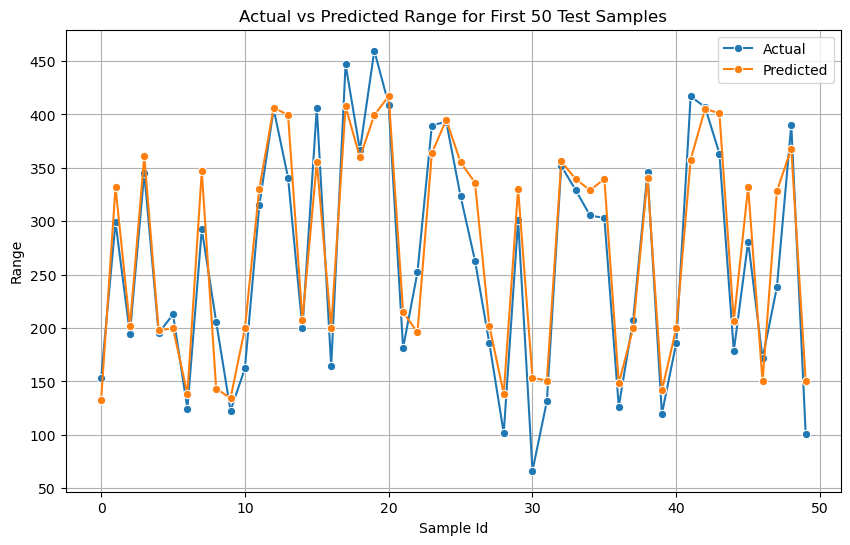

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a DataFrame to compare actual and predicted values
Results = pd.DataFrame(columns=['Actual', 'Predicted'])

# Add actual and predicted values to the DataFrame
Results['Actual'] = y_test.values  # Ensure correct indexing
Results['Predicted'] = y_test_pred

# Reset index and add a unique 'id' column for plotting
Results.reset_index(drop=True, inplace=True)
Results['Id'] = Results.index

# Display the first 15 rows of the Results DataFrame
print(Results.head(15))

# Plot the actual vs. predicted values for the first 50 rows
plt.figure(figsize=(10, 6))
sns.lineplot(x='Id', y='Actual', data=Results.head(50), label='Actual', marker='o')
sns.lineplot(x='Id', y='Predicted', data=Results.head(50), label='Predicted', marker='o')
plt.title("Actual vs Predicted Range for First 50 Test Samples")
plt.xlabel("Sample Id")
plt.ylabel("Range")
plt.legend()
plt.grid(True)
plt.show()

Best Hyperparameters: {'alpha': 10.0, 'l1_ratio': 0.5}

ElasticNet Regression Results (After Tuning):
R^2 on Training Set: 0.90
R^2 on Testing Set: 0.90
Mean Squared Error on Test Set: 934.88


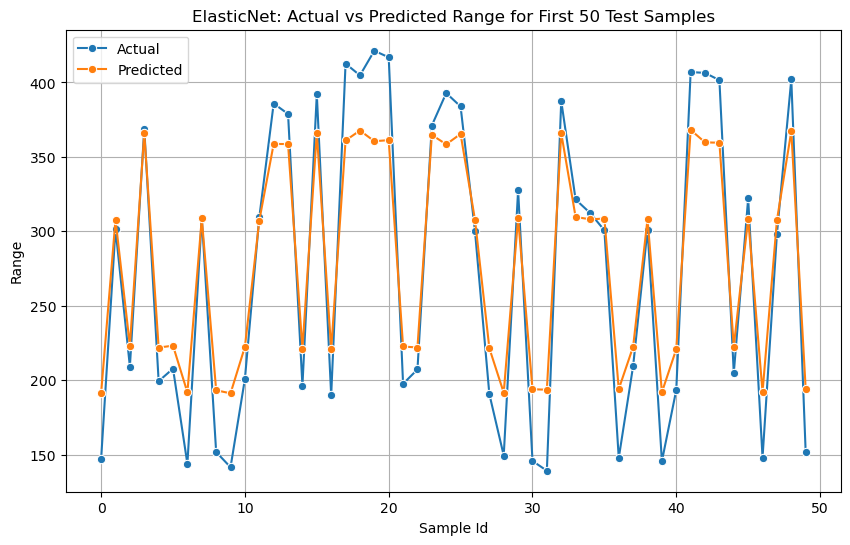

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the dataset

# Preprocessing: Replace with your actual column names
target_column = 'Range'  # Replace with the actual target column
X = data.drop(columns=[target_column])
y = data[target_column]

# Handle categorical features if present (example: one-hot encoding or label encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define stricter parameter grid for ElasticNet
param_grid = {
    'alpha': [10.0, 50.0, 100.0, 200.0],  # Higher regularization strength
    'l1_ratio': [0.1, 0.3, 0.5]          # Lower sparsity
}

# GridSearchCV for ElasticNet
elasticnet_grid = GridSearchCV(estimator=ElasticNet(max_iter=5000), param_grid=param_grid, cv=5, scoring='r2')
elasticnet_grid.fit(X_train_scaled, y_train)

# Best parameters and model training
best_params = elasticnet_grid.best_params_
print("Best Hyperparameters:", best_params)

elasticnet_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=5000)
elasticnet_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_en = elasticnet_model.predict(X_train_scaled)
y_test_pred_en = elasticnet_model.predict(X_test_scaled)

# Evaluation metrics
r2_train_en = r2_score(y_train, y_train_pred_en)
r2_test_en = r2_score(y_test, y_test_pred_en)
mse_test_en = mean_squared_error(y_test, y_test_pred_en)

# Display results
print("\nElasticNet Regression Results (After Tuning):")
print(f"R^2 on Training Set: {r2_train_en:.2f}")
print(f"R^2 on Testing Set: {r2_test_en:.2f}")
print(f"Mean Squared Error on Test Set: {mse_test_en:.2f}")

# Prepare DataFrame for visualization
Results_en = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_en
}).reset_index(drop=True)
Results_en['Id'] = Results_en.index

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Id', y='Actual', data=Results_en.head(50), label='Actual', marker='o')
sns.lineplot(x='Id', y='Predicted', data=Results_en.head(50), label='Predicted', marker='o')
plt.title("ElasticNet: Actual vs Predicted Range for First 50 Test Samples")
plt.xlabel("Sample Id")
plt.ylabel("Range")
plt.legend()
plt.grid(True)
plt.show()


Best Hyperparameters (Ridge): {'ridge__alpha': 10.0}

Ridge Regression Results:
R^2 on Testing Set: 0.82
Mean Squared Error on Test Set: 2473.10


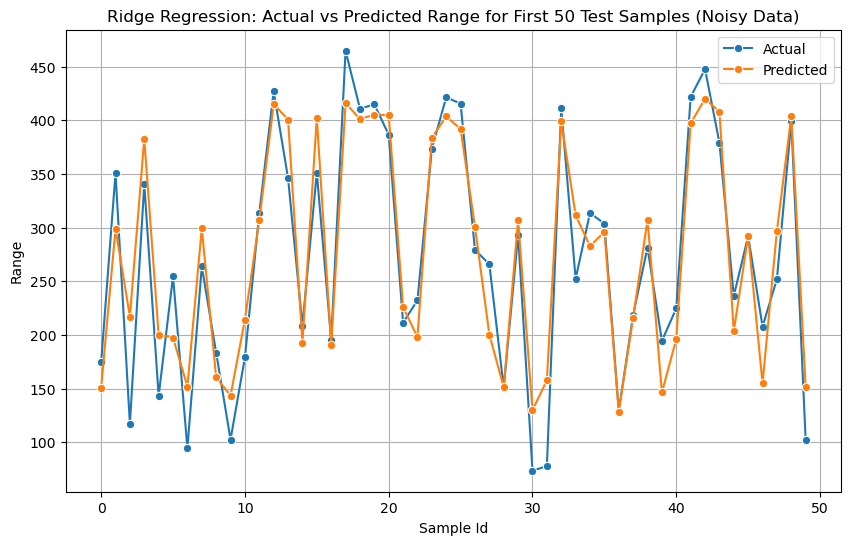

In [25]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the dataset is already loaded into a DataFrame called 'df'
# Replace 'df' with your actual dataset variable name

# Define features and target variable
X = df.drop(columns=['Range'])  # Replace 'Range' with the actual target column name
y = df['Range']                # Replace 'Range' with the actual target column name

# Add noise to the target variable
np.random.seed(42)  # For reproducibility
noise = np.random.normal(0, 50, size=y.shape)  # Mean 0, standard deviation 50
y_noisy = y + noise

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Define a pipeline that first preprocesses data, then applies Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Define a parameter grid for Ridge Regression
param_grid = {'ridge__alpha': [10.0, 100.0, 500.0, 1000.0, 5000.0]}  # Adjust for regularization strength

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.2, random_state=42)

# GridSearchCV for Ridge
ridge_grid = GridSearchCV(estimator=ridge_pipeline, param_grid=param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

# Best parameters and model training
best_params_ridge = ridge_grid.best_params_
print("Best Hyperparameters (Ridge):", best_params_ridge)

# Predictions
y_train_pred_ridge = ridge_grid.predict(X_train)
y_test_pred_ridge = ridge_grid.predict(X_test)

# Evaluation metrics
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)

# Display results
print("\nRidge Regression Results:")
#print(f"R^2 on Training Set: {r2_train_ridge:.2f}")
print(f"R^2 on Testing Set: {r2_test_ridge:.2f}")
print(f"Mean Squared Error on Test Set: {mse_test_ridge:.2f}")

# Prepare DataFrame for visualization
Results_ridge = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred_ridge
}).reset_index(drop=True)
Results_ridge['Id'] = Results_ridge.index

# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Id', y='Actual', data=Results_ridge.head(50), label='Actual', marker='o')
sns.lineplot(x='Id', y='Predicted', data=Results_ridge.head(50), label='Predicted', marker='o')
plt.title("Ridge Regression: Actual vs Predicted Range for First 50 Test Samples (Noisy Data)")
plt.xlabel("Sample Id")
plt.ylabel("Range")
plt.legend()
plt.grid(True)
plt.show()


In [1]:
df


NameError: name 'df' is not defined